In [7]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from tqdm import tqdm
import math
import pandas as pd
import seaborn as sns

In [ ]:
# data_loader = DataLoader(batch_size=64)
# X_train, y_train = data_loader.get_train_data()
# X_train = X_train.T
# y_train = y_train.reshape(y_train.shape[0], -1)
# print(X_train.shape, y_train.shape)

# Insepecting dataset

In [3]:
df = pd.read_csv('/home/ayman/FOE-Linux/Aroma/nn/digit-recognizer/train.csv')

/home/ayman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0

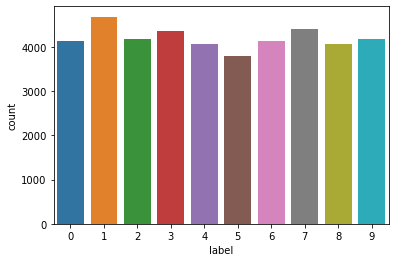

In [12]:
sns.countplot(df['label'])
df.isnull().sum().sum()

In [17]:
X = df.drop(labels=['label'], axis=1)
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [19]:
X = ((X / 255.) * 2) -1 
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.999993,-0.999996,-0.999998,-0.999999,-0.999999,-1.000000,-1.0,-1.0,-1.0,-1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000194,0.000143,0.000101,0.000054,0.000058,0.000013,0.0,0.0,0.0,0.0
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
50%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
75%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
max,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.992188,-0.992188,-0.992218,-0.992218,-0.992188,-0.998093,-1.0,-1.0,-1.0,-1.0


In [57]:
transform_pipeline = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0, std=1)
    ])
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform_pipeline)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [58]:
def partition(X, Y, batch_size):
        m = X.shape[1]
        mini_batches = []
        num_mini_batches= math.floor(m / batch_size)
        for i in range(0, num_mini_batches):
            mini_batch_X = X[i*batch_size:(i+1)*batch_size, :]
            mini_batch_Y = Y[i*batch_size:(i+1)*batch_size]

            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        # Handling the end case (last mini-batch < mini_batch_size)
        if m % batch_size != 0:
            mini_batch_X = X[batch_size*num_mini_batches:, :]
            mini_batch_Y = Y[batch_size*num_mini_batches:]

            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        return mini_batches


In [59]:
# batches = partition(X_train, y_train, 64)
# print(batches[0][0].shape)

In [60]:
model = nn.Sequential( nn.Linear(784, 128), 
                       nn.ReLU(),
                       nn.Linear(128,64),
                       nn.ReLU(),
                       nn.Linear(64,10),
                       nn.LogSoftmax(dim=1))


print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [61]:
learning_rate = 0.001
betas=(0.5, 0.999)
criteration = nn.NLLLoss()

In [62]:
def training_loop(data_loader, optim, crit, model, epochs=16):

    for i in range(epoch):
        for X,Y in tqdm(trainloader):
            X = X.view(X.shape[0],-1)
            
            optim.zero_grad()
            Y_pred = model(X)

            loss = criteration(Y_pred, Y)
            loss.backward()
            optim.step()

        print("Epoch: ", i + 1, "Loss: ", loss)

In [63]:
optim = torch.optim.Adam(params=model.parameters(), lr=learning_rate, betas=betas)
print("Adam")
training_loop(trainloader, optim, criteration, model)

  0%|          | 1/938 [00:00<02:28,  6.29it/s]

Adam


  1%|          | 7/938 [00:00<00:13, 69.28it/s]

Epoch:  1 Loss:  tensor(0.0936, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:13, 69.72it/s]

Epoch:  2 Loss:  tensor(0.1671, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:14, 63.68it/s]

Epoch:  3 Loss:  tensor(0.1255, grad_fn=<NllLossBackward>)


  1%|          | 8/938 [00:00<00:12, 72.44it/s]

Epoch:  4 Loss:  tensor(0.0296, grad_fn=<NllLossBackward>)


  1%|          | 8/938 [00:00<00:12, 76.18it/s]

Epoch:  5 Loss:  tensor(0.0077, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:15, 61.62it/s]

Epoch:  6 Loss:  tensor(0.0436, grad_fn=<NllLossBackward>)


  1%|          | 8/938 [00:00<00:12, 71.98it/s]

Epoch:  7 Loss:  tensor(0.0008, grad_fn=<NllLossBackward>)


  1%|          | 8/938 [00:00<00:12, 74.33it/s]

Epoch:  8 Loss:  tensor(0.0006, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:13, 69.34it/s]

Epoch:  9 Loss:  tensor(0.0007, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:14, 63.53it/s]

Epoch:  10 Loss:  tensor(0.0038, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:13, 69.63it/s]

Epoch:  11 Loss:  tensor(0.0049, grad_fn=<NllLossBackward>)


  1%|          | 8/938 [00:00<00:12, 73.94it/s]

Epoch:  12 Loss:  tensor(0.0009, grad_fn=<NllLossBackward>)


  1%|          | 6/938 [00:00<00:18, 51.38it/s]

Epoch:  13 Loss:  tensor(0.0020, grad_fn=<NllLossBackward>)


  1%|          | 6/938 [00:00<00:15, 59.96it/s]

Epoch:  14 Loss:  tensor(0.0007, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:14, 63.43it/s]

Epoch:  15 Loss:  tensor(0.0017, grad_fn=<NllLossBackward>)


100%|██████████| 938/938 [00:15<00:00, 62.03it/s]

Epoch:  16 Loss:  tensor(0.0079, grad_fn=<NllLossBackward>)


In [64]:
optim = torch.optim.Adagrad(params=model.parameters(), lr=learning_rate)
print("AdaGrad")
training_loop(trainloader, optim, criteration, model)

  1%|          | 7/938 [00:00<00:14, 64.01it/s]

AdaGrad


  1%|          | 7/938 [00:00<00:14, 64.47it/s]

Epoch:  1 Loss:  tensor(0.0005, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:14, 64.28it/s]

Epoch:  2 Loss:  tensor(0.0003, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:13, 67.21it/s]

Epoch:  3 Loss:  tensor(0.0002, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:14, 65.79it/s]

Epoch:  4 Loss:  tensor(0.0002, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:14, 62.13it/s]

Epoch:  5 Loss:  tensor(0.0002, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:14, 65.70it/s]

Epoch:  6 Loss:  tensor(0.0016, grad_fn=<NllLossBackward>)


  1%|          | 6/938 [00:00<00:17, 52.93it/s]

Epoch:  7 Loss:  tensor(0.0003, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:13, 67.26it/s]

Epoch:  8 Loss:  tensor(0.0013, grad_fn=<NllLossBackward>)


  1%|          | 5/938 [00:00<00:18, 49.18it/s]

Epoch:  9 Loss:  tensor(0.0001, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:14, 66.37it/s]

Epoch:  10 Loss:  tensor(0.0001, grad_fn=<NllLossBackward>)


  1%|          | 5/938 [00:00<00:19, 47.37it/s]

Epoch:  11 Loss:  tensor(0.0010, grad_fn=<NllLossBackward>)


  1%|          | 6/938 [00:00<00:16, 57.36it/s]

Epoch:  12 Loss:  tensor(0.0001, grad_fn=<NllLossBackward>)


  1%|          | 6/938 [00:00<00:18, 51.61it/s]

Epoch:  13 Loss:  tensor(0.0011, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:13, 68.16it/s]

Epoch:  14 Loss:  tensor(0.0010, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:14, 66.35it/s]

Epoch:  15 Loss:  tensor(0.0004, grad_fn=<NllLossBackward>)


100%|██████████| 938/938 [00:15<00:00, 61.65it/s]

Epoch:  16 Loss:  tensor(0.0004, grad_fn=<NllLossBackward>)


In [68]:
optim = torch.optim.SGD(params=model.parameters(), lr=learning_rate)
print("Basic SGD")
training_loop(trainloader, optim, criteration, model)

  1%|          | 5/938 [00:00<00:20, 45.31it/s]

Basic SGD


  1%|          | 8/938 [00:00<00:13, 71.11it/s]

Epoch:  1 Loss:  tensor(0.0002, grad_fn=<NllLossBackward>)


  1%|          | 6/938 [00:00<00:17, 52.41it/s]

Epoch:  2 Loss:  tensor(0.0005, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:14, 65.18it/s]

Epoch:  3 Loss:  tensor(8.0516e-05, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:13, 67.93it/s]

Epoch:  4 Loss:  tensor(0.0004, grad_fn=<NllLossBackward>)


  1%|          | 6/938 [00:00<00:16, 56.63it/s]

Epoch:  5 Loss:  tensor(0.0011, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:13, 67.84it/s]

Epoch:  6 Loss:  tensor(0.0003, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:14, 65.63it/s]

Epoch:  7 Loss:  tensor(0.0016, grad_fn=<NllLossBackward>)


  1%|          | 7/938 [00:00<00:13, 68.34it/s]

Epoch:  8 Loss:  tensor(0.0002, grad_fn=<NllLossBackward>)


  1%|          | 8/938 [00:00<00:13, 71.21it/s]

Epoch:  9 Loss:  tensor(4.3591e-05, grad_fn=<NllLossBackward>)


  1%|          | 6/938 [00:00<00:15, 58.71it/s]

Epoch:  10 Loss:  tensor(0.0010, grad_fn=<NllLossBackward>)


  1%|          | 8/938 [00:00<00:13, 70.85it/s]

Epoch:  11 Loss:  tensor(0.0002, grad_fn=<NllLossBackward>)


  1%|          | 6/938 [00:00<00:16, 56.94it/s]

Epoch:  12 Loss:  tensor(1.0493e-05, grad_fn=<NllLossBackward>)


  1%|          | 5/938 [00:00<00:20, 46.08it/s]

Epoch:  13 Loss:  tensor(0.0009, grad_fn=<NllLossBackward>)


  1%|          | 8/938 [00:00<00:12, 71.88it/s]

Epoch:  14 Loss:  tensor(0.0005, grad_fn=<NllLossBackward>)


  1%|          | 8/938 [00:00<00:11, 77.96it/s]

Epoch:  15 Loss:  tensor(0.0004, grad_fn=<NllLossBackward>)


100%|██████████| 938/938 [00:11<00:00, 84.25it/s]

Epoch:  16 Loss:  tensor(8.1584e-07, grad_fn=<NllLossBackward>)
